In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving cereal.csv to cereal.csv


In [8]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['cereal.csv']))
print(df)


                         name mfr type  ...  weight  cups     rating
0                   100% Bran   N    C  ...     1.0  0.33  68.402973
1           100% Natural Bran   Q    C  ...     1.0  1.00  33.983679
2                    All-Bran   K    C  ...     1.0  0.33  59.425505
3   All-Bran with Extra Fiber   K    C  ...     1.0  0.50  93.704912
4              Almond Delight   R    C  ...     1.0  0.75  34.384843
..                        ...  ..  ...  ...     ...   ...        ...
72                    Triples   G    C  ...     1.0  0.75  39.106174
73                       Trix   G    C  ...     1.0  1.00  27.753301
74                 Wheat Chex   R    C  ...     1.0  0.67  49.787445
75                   Wheaties   G    C  ...     1.0  1.00  51.592193
76        Wheaties Honey Gold   G    C  ...     1.0  0.75  36.187559

[77 rows x 16 columns]


In [9]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Given dataset is already cleaned, so I will skip data cleaning process.

Now, I will make a Bargraph to plot the 20 cereals which will show the ratings given by consumers. 

Name of the Graph plot is "Rating graph" having axes as follows - 

x-axis : Ratings given by consumers ,  y-axis : Name of the cereals

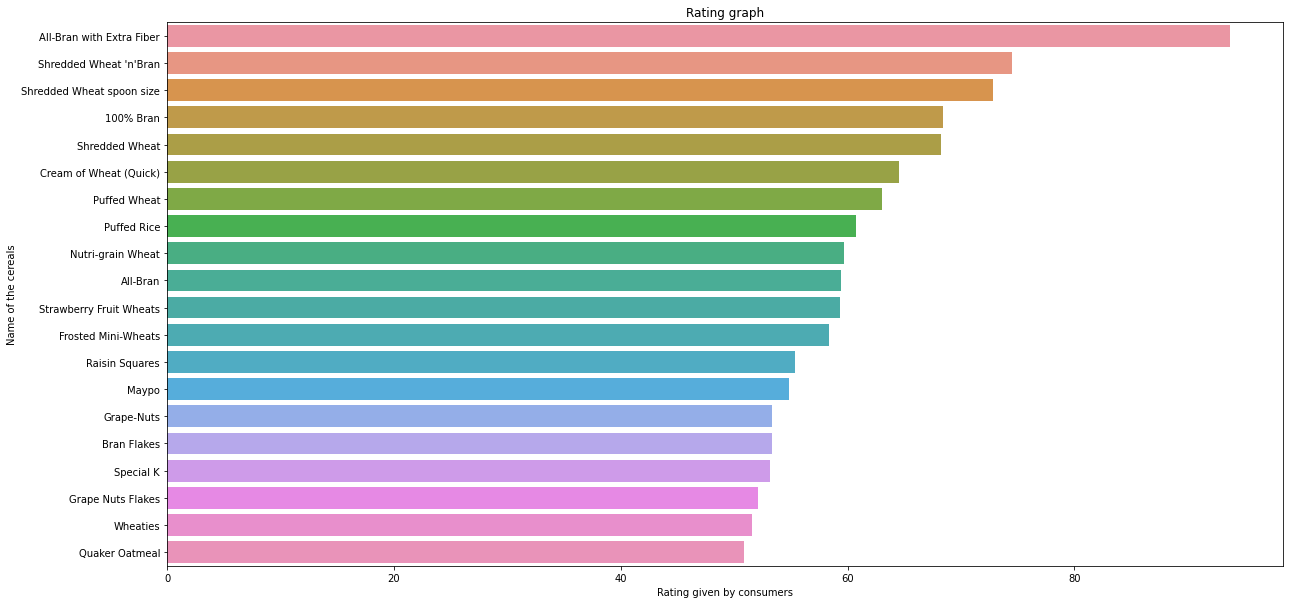

In [15]:
ax = sns.barplot(x="rating", y="name", data=df.sort_values('rating',ascending=False)[:20])
_ = ax.set(xlabel='Rating given by consumers', ylabel='Name of the cereals',title = "Rating graph")

This graph shows that might be ***Calories*** are affecting the ***Ratings*** of the cereals given by consumers. (Assuming)

Finding the relationship between Calories and Ratings.



/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


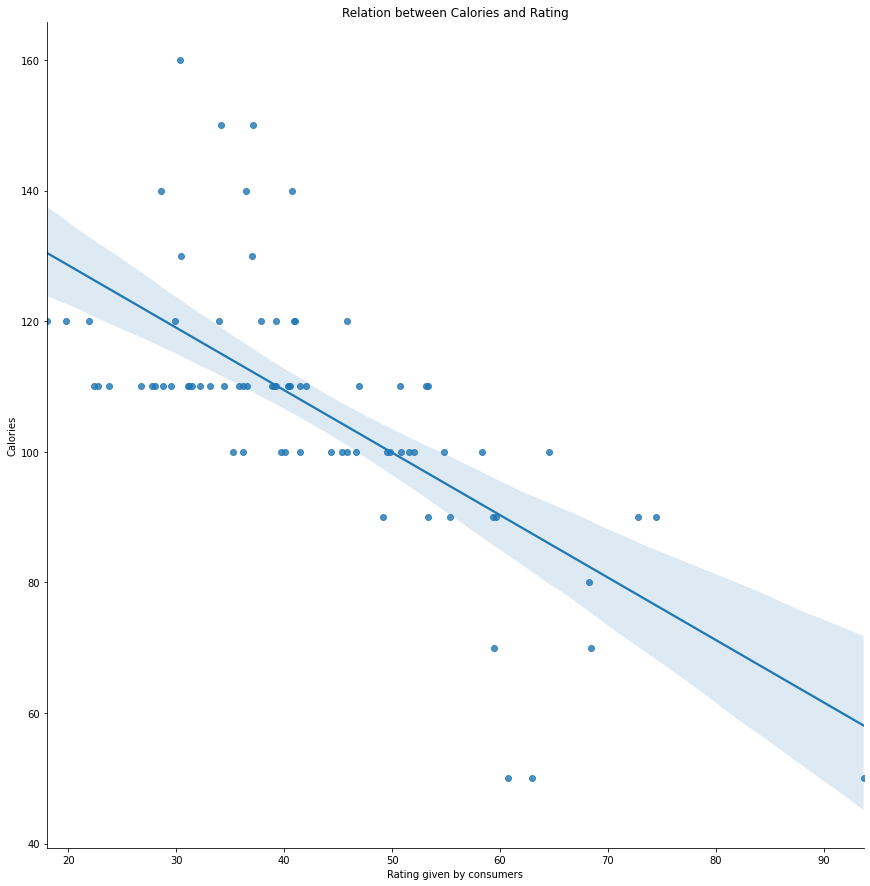

In [19]:
ax = sns.lmplot(size=12, x="rating", y="calories", data=df)
_ = ax.set(xlabel='Rating given by consumers', ylabel='Calories',title = "Relation between Calories and Rating")

**Lmplot :** It plots the data and regression model fits across a FacetGrid. This function combines regplot() and FacetGrid . It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

### The Plot shows that as the Calories in the cereals decreases, the rating by the consumers increases. Hence, the assumption proved true. 

Mathematically, Calories is inversly proportional to the Ratings given by consumers. **bold text** **bold text**

Now, as the relation is proved true it is the time to find the correlation coefficient.

Correlation coefficient helps us determine how strong is the relationship between parameters.  

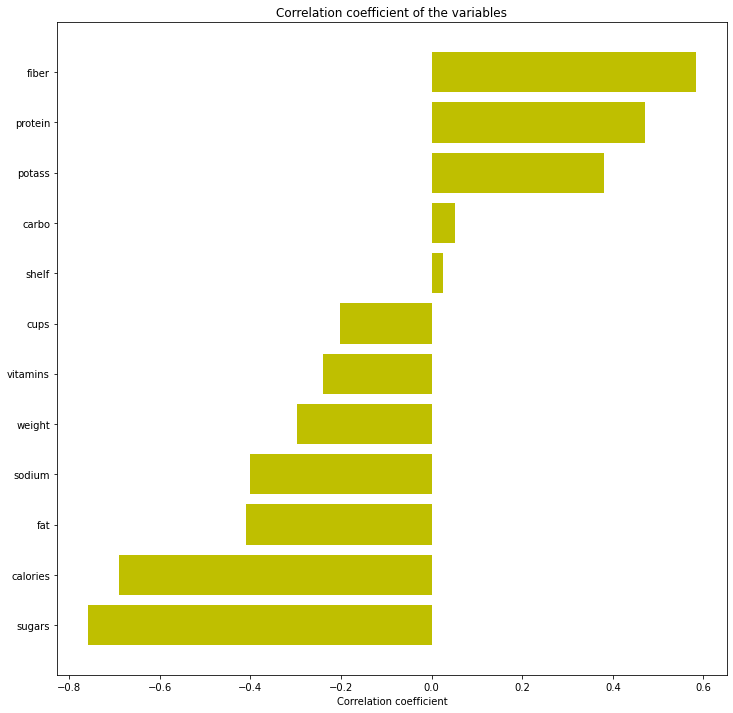

In [22]:
x_cols = [col for col in df.columns if col not in ['rating'] if df[col].dtype=='float64' or 
         df[col].dtype=='int64']
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.rating.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

Positive correlation :

*    Means positive correlation coefficient. The values changes together (direct proportionality relation). 

Negative Correlation : 



*   Means negative correlation coefficient. The values changes inversely (inverse proportionality relation). 







### What we analyse ? 

Fiber , Protein and **Potass** have positive correlation coefficient. So, the cereals having these three in high amount are best valued. 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


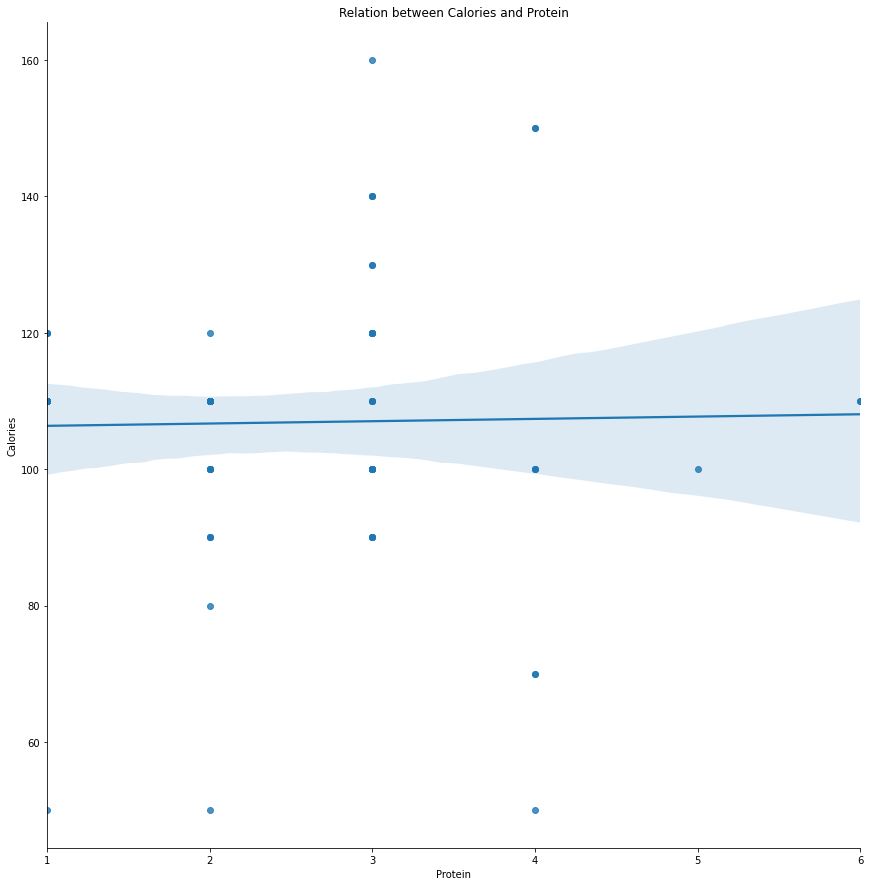

In [23]:
ax = sns.lmplot(size=12, x="protein", y="calories", data=df)
_ = ax.set(xlabel='Protein', ylabel='Calories',title = "Relation between Calories and Protein")

Let's find the Regression between Protein/Calories ratio and the Ratings.

In [24]:
df['protein/calories']=df['protein']/df['calories']

In [25]:
dfBestRating = df[df['rating']>50]

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


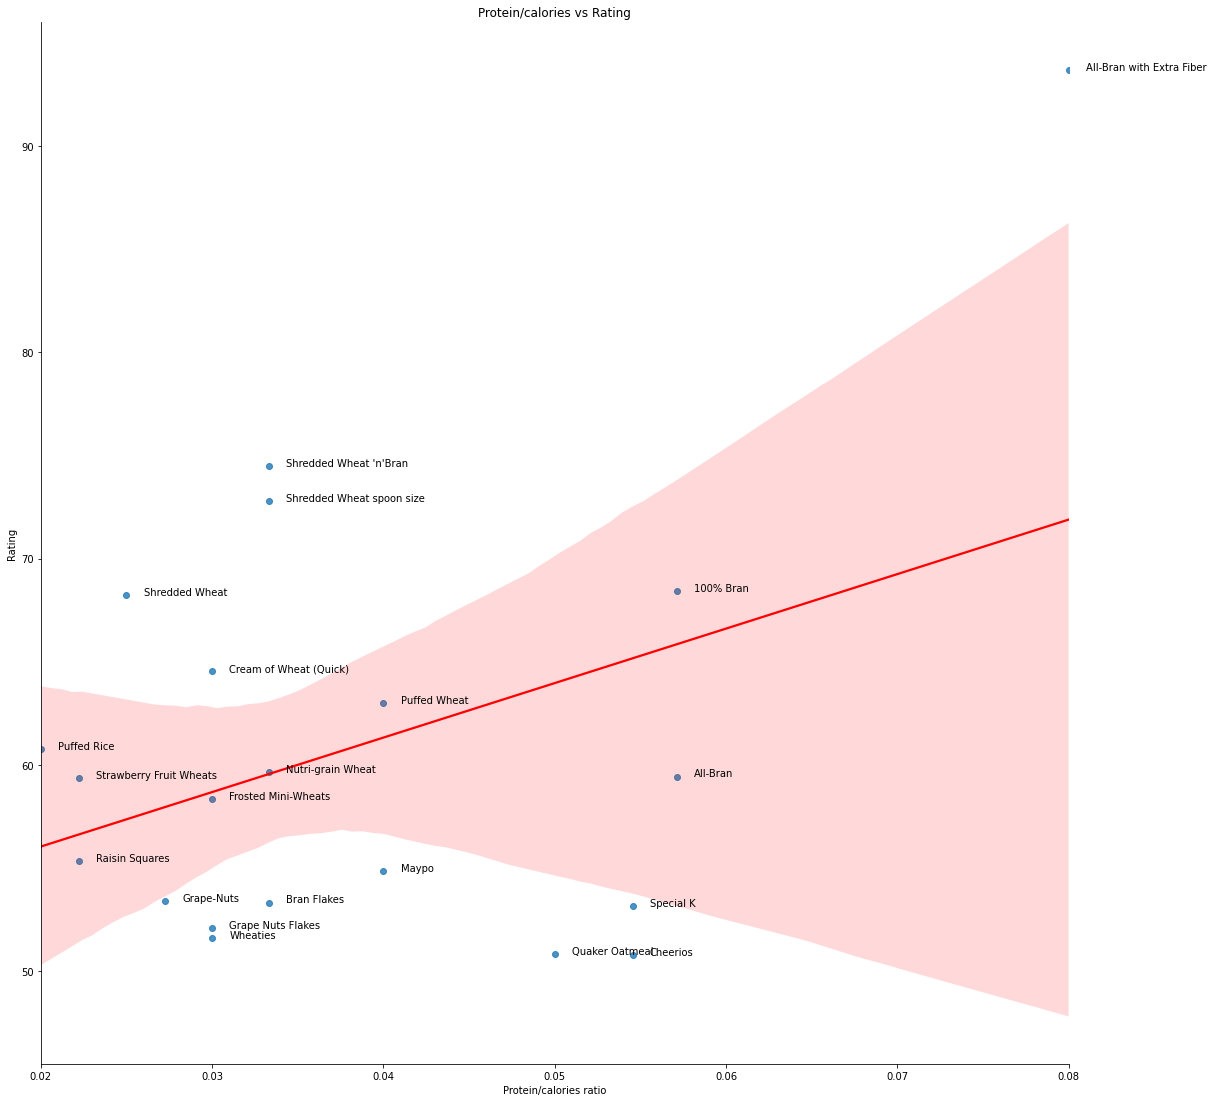

In [31]:
ax = sns.lmplot(x='protein/calories', # Horizontal axis
           y='rating', # Vertical axis
           data=dfBestRating, # Data source
           size = 15,
           line_kws={'color': 'Red'})

plt.title('Protein/calories vs Rating')
# Set x-axis label
plt.xlabel('Protein/calories ratio')
# Set y-axis label
plt.ylabel('Rating')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.001, point['y'], str(point['val']))

label_point(dfBestRating['protein/calories'], dfBestRating['rating'], dfBestRating['name'], plt.gca()) 

The higher Protein/Calories ratio with higher consumer ratings is the best parameter to find which cereal is good in all of them. 
It is considered that highest Protein/Calories ratio food is quite good in muscle building and losing fat. 

### Result : 

**"All bran with extra fibre"** is considered to be good out of all the 80 cereals due to it's higher P/C ratio and higher consumer ratings. 

*But, all the above analysis do not prove at all that cereals are good for health. This is just to find better one out of the bad products.*